#Homework 1

In my experiments, I used data from the us_crime dataset, which is available on the website: https://github.com/adrianstando/imbalanced-benchmarking-set/tree/main

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,TARGET
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,-1
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,1
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,-1
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,-1
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,-1


##Comparison of models

The issue I am dealing with here is binary classification, so I decided to see how 3 very popular models would handle it: logistic regression, random forest and AdaBoost. I will compare their results with a model with a much larger architecture - TabPFN.\
Let's see what accuracy and AUC score I got for each model:

In [35]:
print('Accuracy for each model:')
print(accs.to_string(index=False))

Accuracy for each model:
 Logistic Regression  Random Forest  AdaBoost   TabPFN
            0.953908       0.945892  0.933868 0.940822


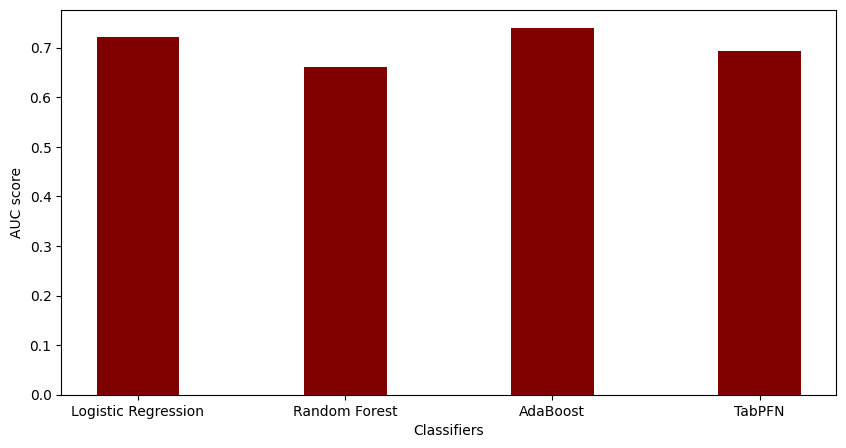

In [37]:
fig.show()

As you can see, AdaBoost achieved the worst accuracy, but was nevertheless the best in terms of AUC score, which means that it has learned well how to do prediction for a smaller class. Logistic regression has surprisingly good metrics, and TabPFN performed quite poorly, most likely because it had to be trained on a smaller set.

#Appendix

##Data prepraration

In [1]:
!pip install tabpfn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 3.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from tabpfn import TabPFNClassifier

In [3]:
df = pd.read_csv('us_crime.csv').iloc[:,1:]
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

##Logistic regression

In [11]:
classifier = LogisticRegression(max_iter = 10000)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
logreg_acc = accuracy_score(y_test, pred)
logreg_auc = roc_auc_score(y_test, pred)

##Random Forrest

In [12]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
randfor_acc = accuracy_score(y_test, pred)
randfor_auc = roc_auc_score(y_test, pred)

##AdaBoost

In [18]:
classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
ada_acc = accuracy_score(y_test, pred)
ada_auc = roc_auc_score(y_test, pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##TabPFN

TabPFN requires smaller training size

In [19]:
XPFN_train, XPFN_test, yPFN_train, yPFN_test = train_test_split(X, y, test_size=0.5, random_state=17)
classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)
classifier.fit(XPFN_train, yPFN_train)
pred = classifier.predict(XPFN_test)
pfn_acc = accuracy_score(yPFN_test, pred)
pfn_auc = roc_auc_score(yPFN_test, pred)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


##Plot

In [31]:
d = {'Logistic Regression': [logreg_acc], 'Random Forest': [randfor_acc], 'AdaBoost': [ada_acc], 'TabPFN': [pfn_acc]}
accs = pd.DataFrame(data=d)

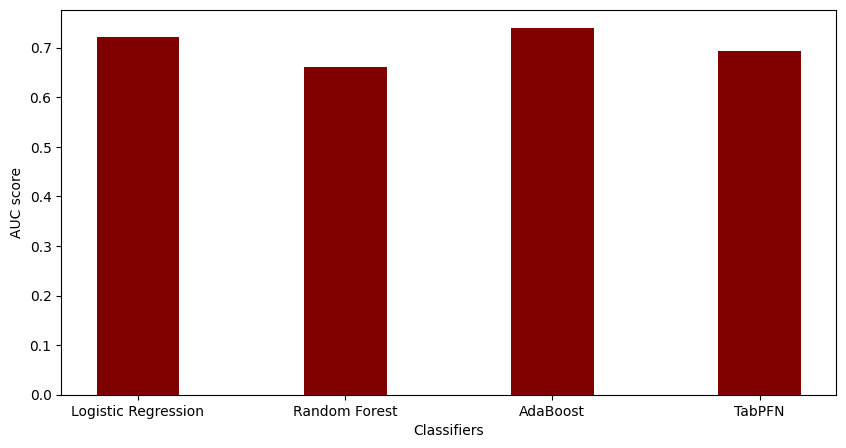

In [36]:
models = ['Logistic Regression', 'Random Forest', 'AdaBoost', 'TabPFN']
aucs = [logreg_auc, randfor_auc, ada_auc, pfn_auc]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(models, aucs, color ='maroon', width = 0.4)

plt.xlabel("Classifiers")
plt.ylabel("AUC score")
fig.show()

##Convert to html

In [ ]:
%%shell
jupyter nbconvert --to html /content/Homework1.ipynb

[NbConvertApp] Converting notebook /content/Homework1.ipynb to html
[NbConvertApp] Writing 608657 bytes to /content/Homework1.html
